In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os
os.getcwd()

'C:\\Users\\isabe\\Downloads\\Group033_FA23'

In [5]:
states_healthinsurance = pd.read_csv('Data/states_healthinsurance.csv')
healthinsurance = pd.read_csv('Data/individual_healthinsurance.csv')

In [6]:
#cleaning 
#replace percentage symbols and dollar signs with empty strings for easier analysis later on

states_healthinsurance['Uninsured Rate Change (2010-2015)'] = states_healthinsurance['Uninsured Rate Change (2010-2015)'].str.replace('%', '')
states_healthinsurance['Uninsured Rate (2010)'] = states_healthinsurance['Uninsured Rate (2010)'].str.replace('%', '')
states_healthinsurance['Uninsured Rate (2015)'] = states_healthinsurance['Uninsured Rate (2015)'].str.replace('%', '')

states_healthinsurance['Average Monthly Tax Credit (2016)'] = states_healthinsurance['Average Monthly Tax Credit (2016)'].str.replace('$', '')

states_healthinsurance

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9,14.9,-5,36000,390000,17995,16205,750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5,9.5,-8,234000,1365000,63357,56843,306,True,556851.0,920194,363343.0,606146
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309,True,7755381.0,11843081,4087700.0,5829777
5,Colorado,15.9,8.1,-7.8,419000,2949000,108311,67062,318,True,783420.0,1375264,591844.0,820234
6,Connecticut,9.1,6,-3.1,110000,2148000,102917,80759,357,True,NaN,761137,NaN,644136
7,Delaware,9.7,5.9,-3.8,35000,564000,25379,21467,330,True,223324.0,236702,13378.0,186835
8,District of Columbia,7.6,3.8,-3.8,25000,388000,17666,1224,183,True,235786.0,255491,19705.0,90492
9,Florida,21.3,13.3,-8,1597000,8847000,1531714,1428712,305,False,3104996.0,3644673,539677.0,4149593


In [19]:
#create region column and categorize states into the region it's associated with
#this is so it's easier for analysis later on with other data sets that use regions rather than state
state_to_region = {
    'Alabama': 'southeast',
    'Alaska': 'northwest',
    'Arizona': 'southwest',
    'Arkansas': 'southeast',
    'California': 'southwest',
    'Colorado': 'southwest',
    'Connecticut': 'northeast',
    'Delaware': 'northeast',
    'District of Columbia': 'northeast',
    'Florida': 'southeast',
    'Georgia': 'southeast',
    'Hawaii': 'southwest',
    'Idaho': 'northwest',
    'Illinois': 'northeast',
    'Indiana': 'northeast',
    'Iowa': 'northeast',
    'Kansas' : 'southwest',
    'Kentucky' : 'southeast',
    'Louisiana' : 'southeast',
    'Maine' : 'northeast',
    'Maryland' : "southeast",
    'Massachusetts' : 'northeast',
    'Michigan' : 'northeast',
    'Minnesota' : 'northeast',
    'Mississippi' : 'southeast',
    'Missouri' : 'southeast',
    'Montana' : 'northwest',
    'Nebraska' : 'northwest',
    'Nevada': 'southwest',
    'New Hampshire' : 'northeast',
    'New Jersey' : 'northeast',
    'New Mexico': 'southwest',
    'New York': 'northeast',
    'North Carolina': 'southeast',
    'North Dakota':'northwest',
    'Ohio':'northeast',
    'Oklahoma': 'southwest',
    'Oregon':'northwest',
    'Pennsylvania':'northeast',
    'Rhode Island':'northeast',
    'South Carolina':'southeast',
    'South Dakota': 'northwest',
    'Tennessee':'southwest',
    'Texas':'southwest',
    'Utah':'southwest',
    'Vermont':'northeast',
    'Virginia':'southeast',
    'Washington':'northwest',
    'West Virginia': 'southwest',
    'Wisconsin': 'northeast',
    'Wyoming':'northeast',
}

states_healthinsurance['region'] = states_healthinsurance['State'].str.strip().map(state_to_region)
states_healthinsurance

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016),region
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310,False,799176.0,910775,111599.0,989855,southeast
1,Alaska,19.9,14.9,-5,36000,390000,17995,16205,750,True,122334.0,166625,44291.0,88966,northwest
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230,True,1201770.0,1716198,514428.0,1175624,southwest
3,Arkansas,17.5,9.5,-8,234000,1365000,63357,56843,306,True,556851.0,920194,363343.0,606146,southeast
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309,True,7755381.0,11843081,4087700.0,5829777,southwest
5,Colorado,15.9,8.1,-7.8,419000,2949000,108311,67062,318,True,783420.0,1375264,591844.0,820234,southwest
6,Connecticut,9.1,6,-3.1,110000,2148000,102917,80759,357,True,NaN,761137,NaN,644136,northeast
7,Delaware,9.7,5.9,-3.8,35000,564000,25379,21467,330,True,223324.0,236702,13378.0,186835,northeast
8,District of Columbia,7.6,3.8,-3.8,25000,388000,17666,1224,183,True,235786.0,255491,19705.0,90492,northeast
9,Florida,21.3,13.3,-8,1597000,8847000,1531714,1428712,305,False,3104996.0,3644673,539677.0,4149593,southeast


In [5]:
healthinsurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##  Exploratory Data Analytics

In [24]:
states_healthinsurance.describe()

,Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
count,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.000000e+01,5.200000e+01,5.000000e+01,5.200000e+01
mean,7.479423e+05,6.626615e+06,4.262050e+05,3.611388e+05,2.255699e+06,2.828190e+06,6.442463e+05,2.173923e+06
std,2.691466e+06,2.370240e+07,1.538234e+06,1.306590e+06,7.945644e+06,1.017933e+07,2.306655e+06,7.855834e+06
min,1.500000e+04,3.350000e+05,1.331300e+04,1.224000e+03,6.751800e+04,6.358300e+04,-3.935000e+03,8.896600e+04
25%,9.725000e+04,8.797500e+05,5.109700e+04,4.371700e+04,2.897750e+05,3.091128e+05,5.397900e+04,3.208870e+05
50%,2.245000e+05,2.305500e+06,1.306725e+05,9.817550e+04,7.946135e+05,9.780525e+05,2.341560e+05,8.187530e+05
75%,4.122500e+05,4.386500e+06,2.260822e+05,1.936845e+05,1.274017e+06,1.732724e+06,4.562492e+05,1.298255e+06
max,1.930400e+07,1.722920e+08,1.108133e+07,9.389609e+06,5.639248e+07,7.353293e+07,1.610616e+07,5.714998e+07


State                                           52
Uninsured Rate (2010)                           46
Uninsured Rate (2015)                           43
Uninsured Rate Change (2010-2015)               40
Health Insurance Coverage Change (2010-2015)    52
Employer Health Insurance Coverage (2015)       52
Marketplace Health Insurance Coverage (2016)    52
Marketplace Tax Credits (2016)                  52
Average Monthly Tax Credit (2016)               47
State Medicaid Expansion (2016)                  2
Medicaid Enrollment (2013)                      50
Medicaid Enrollment (2016)                      52
Medicaid Enrollment Change (2013-2016)          50
Medicare Enrollment (2016)                      52
region                                           4
dtype: int64

<AxesSubplot:xlabel='Marketplace Tax Credits (2016)', ylabel='count'>

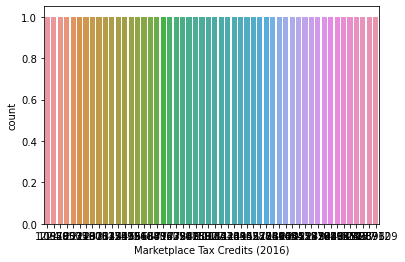

In [31]:
sns.countplot(data = states_healthinsurance, x = 'Marketplace Tax Credits (2016)')